## Convolutional Neural Networks (CNNs)

In this exercise we aim to shed some light on the Convolution Neural Networks by explaining the primary concepts behind CNN such as convolution layers and feature mapping and implement a CNN model to solve the MNIST numbers problem of recognizing numbers from images of handdrawn numbers.

### The basics

We have previously worked with multilayer perceptron models - these operated by having one or more layers of neurons, and a good way to attempt to understand CNN is to compare them to MLP models. In MLP the input is connected to one or more 'hidden' layers with some weights, and each subsequent hidden is connected to a layer before it. MLP layer consists of a one dimensional array of neurons. CNN, much like multilayer perceptrons, operate on layers connected to each other. The primary difference is that CNN models utilize a 2x2 matrix of neurons instead of a 1d array. This makes them much more fitting for tasks such as image recognition, where the input image can easily be represented as a 2d array of pixels.

Another major difference is that in CNN each neuron in a layer is connected to specific subset of last layer called its receptive field. A receptive field is a i x i matrix, and can be thought of as a neurons 'field of vision'. Each neuron performs a convolution operation on its input based on a kernel (filter matrix) of the same size as the receptive fied.

<img align = "middle" src="convolution_layer_geron.png" width="500"/>
  
<figcaption align = "center"><b>Example of convolution layer. The "cone" coming from the top layer is the receptive field of a neuron of size (3x3). </b> <i>A. Geron, Hands on Machine Learning</i></figcaption>



## Using CNN to predict MNIST numbers dataset.

We will now try to create a new CNN model using Keras framework and tweak it to predict the numbers out of an image with high accuracy.



In [8]:
# Methods for downloading and plotting the data

from sklearn.datasets import fetch_openml
import pandas as pd

# mnist 784 dataset has id == 554: https://www.openml.org/search?type=data&status=active&id=554

def MNIST_GetDataSet() -> tuple[pd.DataFrame, pd.Series]:
    X, y = fetch_openml(version="active", data_id=554, return_X_y=True)
    return X, y

%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

X, y_true = MNIST_GetDataSet()
print("OK")

c:\Users\nastr\anaconda3\envs\swmal\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


OK


To be able to feed the data into a cnn model, we have to reshape it into 28x28x1 shape, since each image consists of 28x28 pixels. This is because by default the data is flattened and instead of using 28x28 pixels it's shaped as an array with length of 784.

In [9]:
print(X.shape)

# Reshape the data
X_all = X.to_numpy()
X_all = X_all.reshape(70000, 28, 28, 1)
print(X_all.shape)
X_train = X_all[0:60000, :, :, :]
X_test = X_all[60000: 70000, :, :, :]
print(X_train.shape)



(70000, 784)
(70000, 28, 28, 1)
(60000, 28, 28, 1)


The output of the model will have to be a classification of a number between 0 and 9. At this step it is necessary to convert the train/test predictions to one-hot encoded values instead of the strings they are now. 

In [10]:
# This performs 'one-hot encoding'
from keras.utils import to_categorical
# Right now y_true is a vector of string with '0' to '9' in them
print(y_true[0:5])

# X_train = X_train[0:60000]
# X_test = X_[60000:70000]
# Convert the string to an array of 0s and 1s, where the "correct" value is given a 1 and each other value is a 0
y_train = to_categorical(y_true[0:60000])
y_test = to_categorical(y_true[60000:70000])

print(y_train[0:5])



0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Lets train some cnn models to try to categorize the numbers. Additionally, since some of the fitting will take a long time, let's measure how long they take to train as well.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from pandas import Series
import time

def printAccData(acc : dict[str, float]):
    valid_acc = Series(fittingLogs.history["val_accuracy"])
    print(valid_acc.describe())
    return valid_acc.mean()

# Model 1: 3 layers, kernel size 1x1

model = Sequential([
    Conv2D(16, kernel_size=1, activation='relu', input_shape=(28,28,1)),
    Conv2D(16, kernel_size=1, activation='relu', input_shape=(28,28,1)),
    Conv2D(16, kernel_size=1, activation='relu', input_shape=(28,28,1)),
])

model.add(Flatten())
# Dense() creates connection to the output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
fittingLogs = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
end = time.time()
print("time to fit: ", end-start, "s")
final = end-start
mean1 = printAccData(fittingLogs)
m1_res = Series([mean1, final])



Epoch 1/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5536 - accuracy: 0.8935 - val_loss: 0.3012 - val_accuracy: 0.9161
Epoch 2/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3114 - accuracy: 0.9123 - val_loss: 0.3014 - val_accuracy: 0.9162
Epoch 3/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2972 - accuracy: 0.9169 - val_loss: 0.2824 - val_accuracy: 0.9189
time to fit:  43.5616250038147 s
count    3.000000
mean     0.917067
std      0.001589
min      0.916100
25%      0.916150
50%      0.916200
75%      0.917550
max      0.918900
dtype: float64


Let's try increasing the kernel size to 3x3.

In [12]:

model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1))),
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(X_train.shape)
print(X_test.shape)
#train the model
start = time.time()
fittingLogs = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
end = time.time()
print("time to fit: ", end-start, "s")
mean2 = printAccData(fittingLogs)

final = end-start
mean2 = printAccData(fittingLogs)
m2_res = Series([mean2, final])




(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1978 - accuracy: 0.9504 - val_loss: 0.0695 - val_accuracy: 0.9762
Epoch 2/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0635 - val_accuracy: 0.9805
Epoch 3/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0847 - val_accuracy: 0.9766
time to fit:  74.64559316635132 s
count    3.000000
mean     0.977767
std      0.002376
min      0.976200
25%      0.976400
50%      0.976600
75%      0.978550
max      0.980500
dtype: float64
count    3.000000
mean     0.977767
std      0.002376
min      0.976200
25%      0.976400
50%      0.976600
75%      0.978550
max      0.980500
dtype: float64


That was a noticable improvement in accuracy! We went from 0.917267 average validation accuracy to 0.977233, although the computation time has rougly doubled. Let's try doubling the filter size.

In [13]:

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1))),
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(X_train.shape)
print(X_test.shape)
#train the model
start = time.time()
fittingLogs = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
end = time.time()
print("time to fit: ", end-start, "s")
mean3 = printAccData(fittingLogs)
final = end-start
m3_res = Series([mean3, final])



(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/3
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1619 - accuracy: 0.9597 - val_loss: 0.0669 - val_accuracy: 0.9791
Epoch 2/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0802 - val_accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.0772 - val_accuracy: 0.9777
time to fit:  135.4416425228119 s
count    3.000000
mean     0.976633
std      0.003139
min      0.973100
25%      0.975400
50%      0.977700
75%      0.978400
max      0.979100
dtype: float64


Uh oh! Our accuracy has barely improved while the computation time for fitting, has doubled. Clearly adding more filters did not yield a noticable improvement to our model. The average accuracy and time can be shown below.


A useful article about improving the performance of a model can be found here: https://machinelearningmastery.com/improve-deep-learning-performance/

<Axes: title={'center': 'exec time'}>

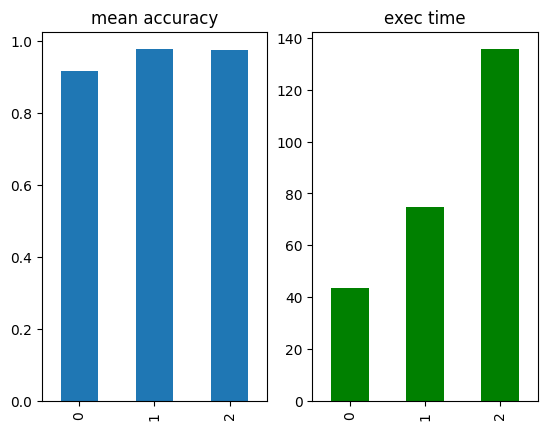

In [14]:
from pandas import DataFrame as df
from matplotlib import pyplot as plt
results_score = Series([m1_res.iloc[0], m2_res.iloc[0], m3_res.iloc[0]])
results_time = Series([m1_res.iloc[1],m2_res.iloc[1], m3_res.iloc[1]])

fig, axes = plt.subplots(1, 2)

x_labels = ["1x1 kernel", "3x3 kernel, 16", "3x3 kernel, 32"]
results_score.plot.bar(ax = axes[0], title="mean accuracy", )
results_time.plot.bar(ax = axes[1], color="green", title="exec time")







## Generalization Error

This exercise will touch the concepts of generalization error with the starting point being from the figure below.

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) On Generalization Error

##### Training/generalization error
The training error is the error from the model training on training data.
<br>
The generalization error is the error from the model being testet on data is hasn't seen during traning. It indicates how well the model can generalize.

##### Underfit/overfit zone
The left of the graph represent the underfitting area, while the right side represent the overfitting area. In the underfitting area the model is too simple to capture underlying patterns in the data and cannot generalize well. <br>
The overfitting area the model is too complex and this results in the model fitting to noise in the training data, making it perform poorly on unseen data. 

##### Optimal Capacity
The optimal capacity is the point where the generalization is lowest. It is the ideal level of model complexity and is the sweet spot between capturing the underlying patterns in the data and avoiding overfitting which results in a model that performs best on unseen data. 

##### Generalization Gap
The gap refers to the difference bewteen the training error and the generalization error. It represent how well the model generalizes to unseen data. A Larger generalization gap indicates poorer genealization performance.

##### X-axis and Y-axes
The x-axis represent capacity, which measures the complecity of the model. The bigger number of capacity the more complex the model is. <br>
The y-axis represent the error which measures the model's performance, with lower value indicating better performance as the error is lower.


### Qb A MSE-Epoch/Error Plot

##### What is an epoch?
It is one pass through a training set during the training of a model. In the example below it represents one iteration over the traning data points during the SGD process. 

##### Code and description of code

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


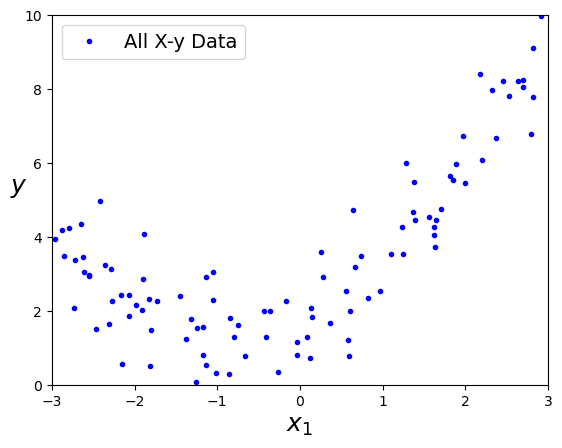

OK


In [2]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

Part 1 is about generating some synthetic data for the polynomial regression, which happens in the GenerateData() function. The data is then splot into taining and validation sets. In a pipeline a polynomial featurea are created using PolynomaialFeatures with a degree of 90, which makes the model cabeable of capturing very complex patterns. And a standard scaler is also used in the pipeline. Lastly it prints the data. 

In [3]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=0,
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 125, mse_train=1.19, mse_val=1.97
  epoch= 126, mse_train=1.18, mse_val=1.95
  epoch= 127, mse_train=1.17, mse_val=1.94
  epoch= 128, mse_train=1.16, mse_val=1.92
  epoch= 129, mse_train=1.15, mse_val=1.91
  epoch= 130, mse_train=1.14, mse_val=1.89
  epoch= 131, mse_train=1.13, mse_val=1.88
  epoch= 132, mse_train=1.12, mse_val=1.87
  epoch= 133, mse_train=1.11, mse_val=1.85
  epoch= 134, mse_train=1.10, mse_val=1.84
  epoch= 135, mse_train=1.09, mse_val=1.83
  epoch= 136, mse_train=1.08, mse_val=1.81
  epoch= 137, mse_train=1.07, mse_val=1.80
  epoch= 138, mse_train=1.06, mse_val=1.79
  epoch= 139, mse_train=1.06, mse_val=1.78
  epoch= 140, mse_train=1.05, mse_val=1.77
  epoch= 141, mse_train=1.04, mse_val=1.76
  epoch= 142, mse_train=1.03, mse_val=1.74
  epoch= 143, mse_train=1.02, mse_val=1.73
  epoch= 144, mse_train=1.02, mse_val=1.72
  epoch= 145, mse_train=1.01, mse_val=1.71
  epoch= 146, mse_train=1.00, mse_val=1.70
  epoch= 147, mse_train=0.99, mse_val=1.69
  epoch= 14

c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 254, mse_train=0.66, mse_val=1.36
  epoch= 255, mse_train=0.66, mse_val=1.36
  epoch= 256, mse_train=0.66, mse_val=1.36
  epoch= 257, mse_train=0.66, mse_val=1.36
  epoch= 258, mse_train=0.65, mse_val=1.36
  epoch= 259, mse_train=0.65, mse_val=1.36
  epoch= 260, mse_train=0.65, mse_val=1.36
  epoch= 261, mse_train=0.65, mse_val=1.36
  epoch= 262, mse_train=0.65, mse_val=1.36
  epoch= 263, mse_train=0.65, mse_val=1.36
  epoch= 264, mse_train=0.65, mse_val=1.36
  epoch= 265, mse_train=0.65, mse_val=1.37
  epoch= 266, mse_train=0.65, mse_val=1.37
  epoch= 267, mse_train=0.64, mse_val=1.37
  epoch= 268, mse_train=0.64, mse_val=1.37
  epoch= 269, mse_train=0.64, mse_val=1.37
  epoch= 270, mse_train=0.64, mse_val=1.37
  epoch= 271, mse_train=0.64, mse_val=1.37
  epoch= 272, mse_train=0.64, mse_val=1.37
  epoch= 273, mse_train=0.64, mse_val=1.37
  epoch= 274, mse_train=0.64, mse_val=1.38
  epoch= 275, mse_train=0.64, mse_val=1.38
  epoch= 276, mse_train=0.64, mse_val=1.38
  epoch= 27

c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 404, mse_train=0.56, mse_val=1.70
  epoch= 405, mse_train=0.56, mse_val=1.70
  epoch= 406, mse_train=0.56, mse_val=1.70
  epoch= 407, mse_train=0.56, mse_val=1.71
  epoch= 408, mse_train=0.56, mse_val=1.71
  epoch= 409, mse_train=0.56, mse_val=1.71
  epoch= 410, mse_train=0.56, mse_val=1.72
  epoch= 411, mse_train=0.56, mse_val=1.72
  epoch= 412, mse_train=0.56, mse_val=1.72
  epoch= 413, mse_train=0.56, mse_val=1.73
  epoch= 414, mse_train=0.56, mse_val=1.73
  epoch= 415, mse_train=0.56, mse_val=1.73
  epoch= 416, mse_train=0.56, mse_val=1.74
  epoch= 417, mse_train=0.56, mse_val=1.74
  epoch= 418, mse_train=0.56, mse_val=1.74
  epoch= 419, mse_train=0.56, mse_val=1.74
  epoch= 420, mse_train=0.56, mse_val=1.75
  epoch= 421, mse_train=0.56, mse_val=1.75
  epoch= 422, mse_train=0.56, mse_val=1.75
  epoch= 423, mse_train=0.56, mse_val=1.76
  epoch= 424, mse_train=0.56, mse_val=1.76
  epoch= 425, mse_train=0.55, mse_val=1.76
  epoch= 426, mse_train=0.55, mse_val=1.77
  epoch= 42

c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linea

Part 2 is about training the model. The Train function performs stochastic gradient descent with some parameters. The function iterates over number of epochs. Every iteration/epoch updates the model and calculates the MSE for both the training and validation set. The MSE values are added to train_errors and val_errors. 
<br>
mse_train is the MSE of the model's predictions on the training dataset. It measures how well the model fits the training data.
<br>
mse_val on the other hand is the MSE of the models' prediction og the validation dataset. It measures how well the model generalizes. 

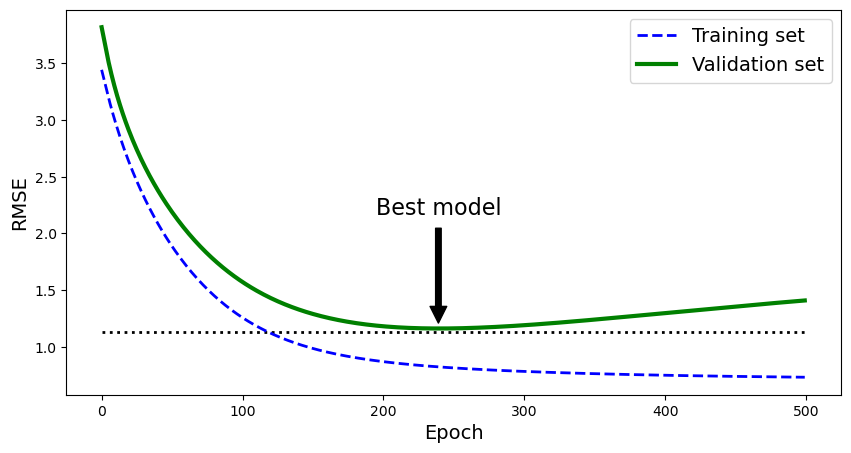

OK


In [4]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In part 3 the code finds the epoch with the lowest validation RMSE using np.argmin(val_errors) and calculates the corresponding RMSE value. The rest of the code is about plotting the training and validation RMSE. This plot visualizes how the RMSE changes over epochs during training. 
From the plot it is seen that the best epoch is between 200 and 300. 

### Qc)  Early Stopping

Early stopping is a technique used to prevent overfitting. The idea is to monitor a models performance on a validation set during training and stop training when the performance starts to degrade. This helps to find a balance between model complexity and generalization performance. 

To implement an early stopping to the polynomal regression there should be an varable that holds the validation error, and stops when this starts to increase instead of descrease. This could be implementet with an if else statement.
<br>
``` 
    if val_error < best_val_error:
        best_val_error = val_error  
        best_epoch = epoch 
    else:
        break
``` 

### Qd) Explain the Polynomial RMSE-Capacity plot


What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.

Iterating...degrees= range(1, 8)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44


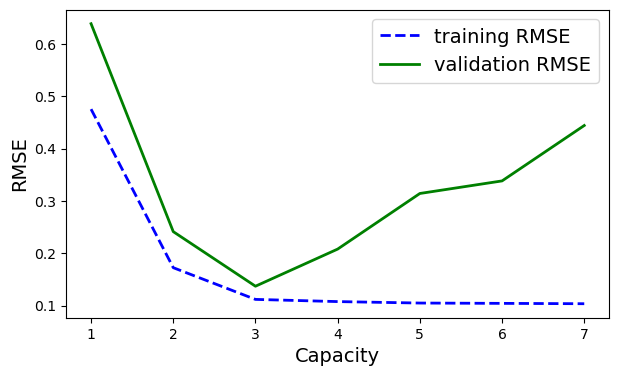

OK


In [2]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

The RMSE-Capacity plot illustrates the relationship between the models capacity and the Root Mean Square Error for both the training data and validation data.<br>
As the models capacity is low it it too simple to capture the underlying patterns in the data, and thereby the error is high in both dataset indicating underfitting. <br>
Beyond capacity 3 the models capacity becomes too hight and it starts fitting the noise in the training data, causing the validation error to rise. This is an indication of overfitting. <br>
At capacity 3 the model validation error is at its lowest indication that it is capable of capturing the patterns in the data and is best at genealizing at this point. 
This plot is a great example of the plot at the start of the exercise as it shows the underfitting, overfitting and sweetspot very clearly. 
<br>
If we try to plot with 15 degress as an example, we get this result:
<br>
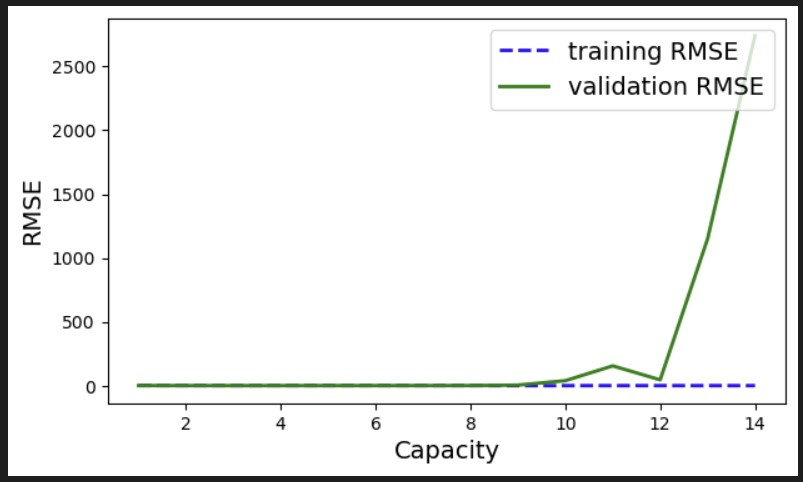
<br>
It is clearly shown that there is way too many degrees and the result is an overfitted model. It doesn't deviate from the training data and captures every noise, which result in very bad generalization.

## Model capacity and under/overfitting

We will explore what capacity is, and what relationshipt there is between capacity and under/overfitting. 

### Qa) Explain the polynomial fitting via code review


Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

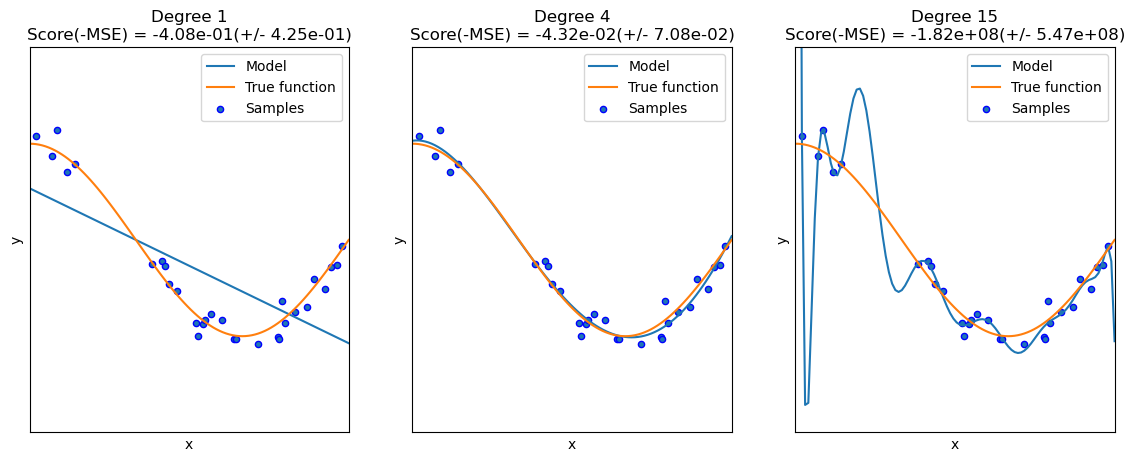

OK


In [ ]:
# TODO: code review 

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

###### Code review
The code above performs a polynomial fitting and demonstrates the effects of different polynomial degrees on the model's performance. 
<br>
First the true_fun represent the true function that fits the data.
The GenerateData function creates data points by using the true function and adding some noise to it. The number of samples/data points is 30.
The code then uses linear regression models with 3 different polynomial features, with degrees (1,4,15) to fit the models to the generated dataset. <br>
For each degree it: <br> 
Creates a pipeline with polynomial_features and linear_regression.  <br>
Fit the pipeline to the training data. <br>
Evaluates the model using cross-validation with 10 folds. <br>
Calculates the mean of the negative MSE.  <br>
Generates predictions for a Range of X values (X_test) using the trained mode. <br>
Lastly it plots the results.

The plot show the 3 different polynomial degrees, each trying to fit the model to the data. The left one, linear regression, clearly doesnt fit the data very well ie. underfitting, and is missing the patterns in the data. The right one is overfitting, which add patterns to the noise and makes the model perform bad at generalization. The middle one is almost a perfect fit as it is almost laying on top of the true function. This means that a degree of 4 is the best fit. 

### Qb) Explain the capacity and under/overfitting concept

What happens when the polynomial degree is low/medium/high with respect to under/overfitting  concepts? 

The Capacity refers to the models ability to represent complex relationships in the data. The more degrees of freedom or parameters a model has, the higher its capacity. 

When a model has low capacity, it means it is too simple to capture underlying patterns in data. It underfit the data, resulting in a model that cannot follow the true function. Underfit models have a high training error and high validation error. 

When a model has high capacity, it means it is too complex and can fit the training data too well, and unintentionally captures noise and outliers which means it is overfitting. High complexity leads to bas generalization. Overfit models have low training error but high validation error. 

With a low-degree polynomial, the model is too simple to capture the patterns as seen in the left plot. <br>
With a hight-degree, the model is too complex and overfits the training data, as seen in the right plot. <br>
With medium-degree the model has an appropiate level of complexity to capture underlying patterns without being sensitive to noise. This is seen in the middle plot. 

The choice of degree is crucial in determining wether the model underfits, goodfit or overfit the data. The plot illustrates this very good. Finding the right balance in model complexity is key to well-performing machine learning models. 

### Qc) Score method



The term "neg_mean_squared_error" is used in scikit-learn to follow a convention where scoring functions are treated as utility functions to be minimized, rather than cost functions to be maximized. The "neg" prefix signifies that the scoring function should be minimized. If it is set to mean_squared_error, an exception is raised with InvalidParameterError.

The degree 15 model have an extremly low MSE score, which indicates better fit. But it overfits the training data and fits every data point perfectly. This just means that MSE is not enough to tell if a model is good or not.



# SWMAL Exercise


## Hyperparameters and Gridsearch 

Machine learning models have certain global parameters which decide on the inner workings of the model. An example of this could be a degree of polynomial models, or number of neurons or hidden layers in neural network models. Choosing the optimal hyperparameters for machine learning models manually is extremely time consuming, since it would involve a silly amount of trial and error. In this exercise we will delve into optimizing the hyperparameters using GridSearch and RandomizedSearch.

### Qa Explain GridSearchCV

The following python code block sets up our functions to load and set up the data, as well as display results of a gridsearch. See detailed explanation in the comments.


In [1]:
# Explanation:
# This block of code loads the data and defines functions which will be used to present results of gridsearch
# GetBestModelCTOR() returns a string with a constructor of the model with the best parameters in it
# SearchReport() displays the best models name, its best parameters, score and index. It also asserts that the scoring system used is f1_micro.
# ClassificationReport() uses the model to predict with the test data supplied in parameters. It then compares the prediction with true values.
# TryKerasImport() asserts that keras module is loaded and ready to be used
# LoadAndSetupData() loads the data and reshapes it if needed, chosen by the parameter 'mode' - either iris, mnist or moon dataset

from time import time
import numpy as np
import sys

from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn import datasets

# Need this to import libitmal on MY Windows machine. Replace with your GITMAL directory or uncomment if you already have gitmal in pythonpath  - Marcin
sys.path.append("C:\\UNI_2023\\ml\\gitmal")

from libitmal import dataloaders as itmaldataloaders # Needed for load of iris, moon and mnist

currmode="N/A" # GLOBAL var!

def SearchReport(model):

    # This method
    def GetBestModelCTOR(model, best_params):
        def GetParams(best_params):
            ret_str=""
            for key in sorted(best_params):
                value = best_params[key]
                temp_str = "'" if str(type(value))=="<class 'str'>" else ""
                if len(ret_str)>0:
                    ret_str += ','
                ret_str += f'{key}={temp_str}{value}{temp_str}'
            return ret_str
        try:
            param_str = GetParams(best_params)
            return type(model).__name__ + '(' + param_str + ')'
        except:
            return "N/A(1)"

    print("\nBest model set found on train set:")
    print()
    print(f"\tbest parameters={model.best_params_}")
    print(f"\tbest '{model.scoring}' score={model.best_score_}")
    print(f"\tbest index={model.best_index_}")
    print()
    print(f"Best estimator CTOR:")
    print(f"\t{model.best_estimator_}")
    print()
    try:
        print(f"Grid scores ('{model.scoring}') on development set:")
        means = model.cv_results_['mean_test_score']
        stds  = model.cv_results_['std_test_score']
        i=0
        for mean, std, params in zip(means, stds, model.cv_results_['params']):
            print("\t[%2d]: %0.3f (+/-%0.03f) for %r" % (i, mean, std * 2, params))
            i += 1
    except:
        print("WARNING: the random search do not provide means/stds")

    global currmode
    assert "f1_micro"==str(model.scoring), f"come on, we need to fix the scoring to be able to compare model-fits! Your scoreing={str(model.scoring)}...remember to add scoring='f1_micro' to the search"
    return f"best: dat={currmode}, score={model.best_score_:0.5f}, model={GetBestModelCTOR(model.estimator,model.best_params_)}", model.best_estimator_

def ClassificationReport(model, X_test, y_test, target_names=None):
    assert X_test.shape[0]==y_test.shape[0]
    print("\nDetailed classification report:")
    print("\tThe model is trained on the full development set.")
    print("\tThe scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred, target_names=target_names))
    print()

def FullReport(model, X_test, y_test, t):
    print(f"SEARCH TIME: {t:0.2f} sec")
    beststr, bestmodel = SearchReport(model)
    ClassificationReport(model, X_test, y_test)
    print(f"CTOR for best model: {bestmodel}\n")
    print(f"{beststr}\n")
    return beststr, bestmodel

def LoadAndSetupData(mode, test_size=0.3):
    assert test_size>=0.0 and test_size<=1.0

    def ShapeToString(Z):
        n = Z.ndim
        s = "("
        for i in range(n):
            s += f"{Z.shape[i]:5d}"
            if i+1!=n:
                s += ";"
        return s+")"

    global currmode
    currmode=mode
    print(f"DATA: {currmode}..")

    if mode=='moon':
        X, y = itmaldataloaders.MOON_GetDataSet(n_samples=5000, noise=0.2)
        itmaldataloaders.MOON_Plot(X, y)
    elif mode=='mnist':
        X, y = itmaldataloaders.MNIST_GetDataSet(load_mode=0)
        if X.ndim==3:
            X=np.reshape(X, (X.shape[0], -1))
    elif mode=='iris':
        X, y = itmaldataloaders.IRIS_GetDataSet()
    else:
        raise ValueError(f"could not load data for that particular mode='{mode}', only 'moon'/'mnist'/'iris' supported")

    print(f'  org. data:  X.shape      ={ShapeToString(X)}, y.shape      ={ShapeToString(y)}')

    assert X.ndim==2
    assert X.shape[0]==y.shape[0]
    assert y.ndim==1 or (y.ndim==2 and y.shape[1]==0)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0, shuffle=True
    )

    print(f'  train data: X_train.shape={ShapeToString(X_train)}, y_train.shape={ShapeToString(y_train)}')
    print(f'  test data:  X_test.shape ={ShapeToString(X_test)}, y_test.shape ={ShapeToString(y_test)}')
    print()

    return X_train, X_test, y_train, y_test

def TryKerasImport(verbose=True):

    kerasok = True
    try:
        import keras as keras_try
    except:
        kerasok = False

    tensorflowkerasok = True
    try:
        import tensorflow.keras as tensorflowkeras_try
    except:
        tensorflowkerasok = False

    ok = kerasok or tensorflowkerasok

    if not ok and verbose:
        if not kerasok:
            print("WARNING: importing 'keras' failed", file=sys.stderr)
        if not tensorflowkerasok:
            print("WARNING: importing 'tensorflow.keras' failed", file=sys.stderr)

    return ok

print(f"OK(function setup" + ("" if TryKerasImport() else ", hope MNIST loads works because it seems you miss the installation of Keras or Tensorflow!") + ")")

OK(function setup, hope MNIST loads works because it seems you miss the installation of Keras or Tensorflow!)


Gridsearch is a method for tuning the hyperparameters of a model automatically, and GridSearchCV is the scikit-learn class that provides this functionality. To use GridSearchCV you simply supply it with the parameters you want it to test, and with values that you want to check. After running GridSearchCV.fit() on a dataset, gridsearch will go through all the possible combination of hyperparameters with the values supplied to it and compare their scoring using a scoring method of your choice. When that is done, the best parameters and the scores will be available in the GridSearchCV object. 

The following code block performs the actual grid search and displays the results using the functions supplied in the previous block. See the code comments for detailed explanation.

In [5]:
# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData('iris')  # 'iris', 'moon', or 'mnist'

# This is the model type we will test
model = svm.SVC(
    gamma=0.001
)

# These are the parameters that we want gridsearch to evaluate
# They are setup as a Dict[name, vals] with name always being a string and vals being whatever type the parameter values are
# In this particular example we will compare kernels 'linear' and 'rbf' against each other with 'C' (the regularization parameter) values being 0.1, 1 and 10
# This means the model will be fit 2*3 times
tuning_parameters = {
    'kernel': ('linear', 'rbf'),
    'C': [0.1, 1, 10]
}

# This is the number of KFolds that gridsearch's cross-validation strategy will use
CV = 5
# Don't display any debug informations
VERBOSE = 0

# Create gridsearch model with hyperparameters tested specified above
# n_jobs is number of jobs ran in parallel when fitting the model: -1 uses all available processors according to sklearn's documentation
# job is a somewhat ambiguous term so what exactly this means depends on the backend implementation in sklearn

# 'f1_micro' scoring method is defined as the micro-averaged harmonic mean of precision and recall.
# According to https://www.visobyte.com/2023/05/precision-recall-and-f1-score-in-object-detection-how-are-they-calculated.html#:~:text=The%20F1%20Score%20is%20a%20harmonic%20mean%20of,%2A%20%28Precision%20%2A%20Recall%29%20%2F%20%28Precision%20%2B%20Recall%29
# The precision score measures the rate of false positives and the recall score measures how accurately it predicts/detects
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

# Find the best parameters and measure the time to do so using X_train, y_train from the iris dataset
start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result. Uses previously defined methods to print data about the model. Also runs the best model to predict (X_test, y_test) validating it.
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

SEARCH TIME: 1.98 sec

Best model set found on train set:

	best parameters={'C': 1, 'kernel': 'linear'}
	best 'f1_micro' score=0.9714285714285715
	best index=2

Best estimator CTOR:
	SVC(C=1, gamma=0.001, kernel='linear')

Grid scores ('f1_micro') on development set:
	[ 0]: 0.962 (+/-0.093) for {'C': 0.1, 'kernel': 'linear'}
	[ 1]: 0.371 (+/-0.038) for {'C': 0.1, 'kernel': 'rbf'}
	[ 2]: 0.971 (+/-0.047) for {'C': 1, 'kernel': 'linear'}
	[ 3]: 0.695 (+/-0.047) for {'C': 1, 'kernel': 'rbf'}
	[ 4]: 0.952 (+/-0.085) for {'C': 10, 'kernel': 'linear'}
	[ 5]: 0.924 (+/-0.097) for {'C': 10, 'kernel': 'rbf'}

Detailed classification report:
	The model is trained on the full development set.
	The scores are computed on the full evaluation set.

              precision    recall  f1-score  

The best parameters for our model are C=1 with linear kernel, having a score of 0.97143

### Qb Hyperparameter Grid Search using an SDG classifier

We will now use grid search to tune parameters of a Stochastic Gradient Descent classifier. 

In [6]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier()

# Notice different parameters, check sklearn documentation for SGDClassifier for description of these parameters
tuning_parameters = {
    'loss': ['hinge', 'log_loss', 'perceptron', 'modified_huber', 'squared_error', 'huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 100],
    'tol' : [0.0001, 0.001, 0.01, 0.1],
    'max_iter' : [int(1e+5), int(1e+6)]
}

# This part is almost the same as in previous code block, we just swap the model
grid_tuned = GridSearchCV(sgd,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

SEARCH TIME: 120.97 sec

Best model set found on train set:

	best parameters={'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 100000, 'penalty': 'l1', 'tol': 0.01}
	best 'f1_micro' score=0.9904761904761905
	best index=222

Best estimator CTOR:
	SGDClassifier(alpha=0.001, loss='modified_huber', max_iter=100000, penalty='l1',
              tol=0.01)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.790 (+/-0.411) for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100000, 'penalty': 'l2', 'tol': 0.0001}
	[ 1]: 0.686 (+/-0.273) for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100000, 'penalty': 'l2', 'tol': 0.001}
	[ 2]: 0.800 (+/-0.194) for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100000, 'penalty': 'l2', 'tol': 0.01}
	[ 3]: 0.771 (+/-0.220) for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100000, 'penalty': 'l2', 'tol': 0.1}
	[ 4]: 0.819 (+/-0.279) for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100000, 'penalty': 'l1', 'tol': 0.0001}
	[ 5]: 0.952 (+/-0.085) for 

The best model has a staggering score of 0.99048, even better than the SVC model we used previously! It did take a few minutes though...

### Qc Hyperparameter Random  Search using an SDG classifier

Another method of finding the optimal parameters is to uze RandomizedSearchCV. In contrast to GridSearchCV it only chooses a few randomly selected samples of each hyperparameter provided, controlled by its own parameter 'n_iter'. This makes it potentially faster then GridSearchCV, but the results might not give the best scores. 

Below is an implementation and a test run of a RandomizedSearchCV.

In [7]:
random_tuned = RandomizedSearchCV(
    sgd,
    tuning_parameters,
    # Pick up to 20 different samples
    n_iter=20,
    # same state should give same rng distribution
    random_state=42,
    cv=CV,
    scoring='f1_micro',
    verbose=VERBOSE,
    n_jobs=-1
)

start = time()
random_tuned.fit(X_train, y_train)
t = time() - start

b0, m0 = FullReport(random_tuned, X_test, y_test, t)
print('OK(random-search)')


SEARCH TIME: 0.12 sec

Best model set found on train set:

	best parameters={'tol': 0.01, 'penalty': 'l1', 'max_iter': 100000, 'loss': 'perceptron', 'alpha': 0.001}
	best 'f1_micro' score=0.9714285714285715
	best index=0

Best estimator CTOR:
	SGDClassifier(alpha=0.001, loss='perceptron', max_iter=100000, penalty='l1',
              tol=0.01)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.971 (+/-0.114) for {'tol': 0.01, 'penalty': 'l1', 'max_iter': 100000, 'loss': 'perceptron', 'alpha': 0.001}
	[ 1]: 0.352 (+/-0.076) for {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 100000, 'loss': 'hinge', 'alpha': 100}
	[ 2]: 0.743 (+/-0.129) for {'tol': 0.1, 'penalty': 'elasticnet', 'max_iter': 100000, 'loss': 'perceptron', 'alpha': 1}
	[ 3]: 0.886 (+/-0.196) for {'tol': 0.001, 'penalty': 'elasticnet', 'max_iter': 1000000, 'loss': 'hinge', 'alpha': 0.01}
	[ 4]: 0.686 (+/-0.322) for {'tol': 0.1, 'penalty': 'elasticnet', 'max_iter': 1000000, 'loss': 'hinge', 'alpha': 0.0001}
	[ 5]: 0.895 (+/-0

We can see in the output that only 20 different combinations of parameters were tested, and the best parameters were not the same as in GridSearchCV test. The f1_score is also lower at 0.914 instead of 0.990. This could potentially be improved by adding more iterations.

## Qd MNIST Search Quest II


It's time to embark on an epic adventure of finding the best model for the MNIST dataset. Here we will use gridsearch on several models to attempt to find the best model according to the f1_micro scoring metric. The best scores across different groups will then be compared to each other. May the best man win!

In our first try, we'd like to test how fast the gridsearch performs, so we're gonna use a GridSearchCV with our existing SGDClassifier. Since complete GridSearch would take forever, we will only select a few parameters from each section.

In [2]:
# Load mnist data separate block, since this can take extra time
X_train, X_test, y_train, y_test = LoadAndSetupData('mnist')


DATA: mnist..


C:\UNI_2023\ml\gitmal\libitmal\dataloaders.py:65: UserWarning: MNIST_GetDataSet(): failed to import and load data in load_mode 'tensorflow.keras', proceding to next mode..
  warnings.warn("MNIST_GetDataSet(): failed to import and load data in load_mode 'tensorflow.keras', proceding to next mode..")
C:\UNI_2023\ml\gitmal\libitmal\dataloaders.py:77: UserWarning: MNIST_GetDataSet(): failed to import and load data in load_mode 'keras', proceding to next mode..
  warnings.warn("MNIST_GetDataSet(): failed to import and load data in load_mode 'keras', proceding to next mode..")
c:\Users\nastr\anaconda3\envs\swmal\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Secti

  org. data:  X.shape      =(70000;  784), y.shape      =(70000)
  train data: X_train.shape=(49000;  784), y_train.shape=(49000)
  test data:  X_test.shape =(21000;  784), y_test.shape =(21000)



In [9]:
# Notice different parameters, check sklearn documentation for SGDClassifier for description of these parameters
tuning_parameters = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1'],
    'alpha' : [0.001, 0.01, 0.1],
    'tol' : [0.001, 0.01, 0.1],
    'max_iter' : [int(1e+2), int(1e+3)]
}

# This part is almost the same as in previous code block, we just swap the model
grid_tuned = GridSearchCV(sgd,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

b0, m0 = FullReport(grid_tuned, X_test, y_test, t)

SEARCH TIME: 17656.98 sec

Best model set found on train set:

	best parameters={'alpha': 0.001, 'loss': 'log_loss', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.1}
	best 'f1_micro' score=0.8937959183673468
	best index=17

Best estimator CTOR:
	SGDClassifier(alpha=0.001, loss='log_loss', max_iter=100, penalty='l1', tol=0.1)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.868 (+/-0.017) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2', 'tol': 0.001}
	[ 1]: 0.864 (+/-0.027) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2', 'tol': 0.01}
	[ 2]: 0.882 (+/-0.012) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2', 'tol': 0.1}
	[ 3]: 0.893 (+/-0.008) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.001}
	[ 4]: 0.892 (+/-0.007) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.01}
	[ 5]: 0.891 (+/-0.003) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'pena

c:\Users\nastr\anaconda3\envs\swmal\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


A score of 0.8938 isn't terrible but it surely can be improved upon. Let's try a model which hasn't been explored during the lectures: RandomForestClassifier.

In [12]:
# Random forest gridsearch!
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

tuning_parameters = {
    'n_estimators' : [50, 100, 1000],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [None, 2, 5, 10]
}

grid_tuned = GridSearchCV(forest,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)


start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

b0, m0 = FullReport(grid_tuned, X_test, y_test, t)

c:\Users\nastr\anaconda3\envs\swmal\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits
SEARCH TIME: 5070.60 sec

Best model set found on train set:

	best parameters={'alpha': 0.001, 'loss': 'log_loss', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.1}
	best 'f1_micro' score=0.8937959183673468
	best index=17

Best estimator CTOR:
	SGDClassifier(alpha=0.001, loss='log_loss', max_iter=100, penalty='l1', tol=0.1)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.868 (+/-0.017) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2', 'tol': 0.001}
	[ 1]: 0.864 (+/-0.027) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2', 'tol': 0.01}
	[ 2]: 0.882 (+/-0.012) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2', 'tol': 0.1}
	[ 3]: 0.893 (+/-0.008) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.001}
	[ 4]: 0.892 (+/-0.007) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.01}
	[ 5]: 0.891 (+/-0.003)

We let this code run on the gpucluster server and got the following results:

![random forest results](mnist_quest/RandomForest.png)

  
With a score of 0.96863 we feel this is a pretty good result! Nonetheless, we might be able to optimize it. The search above was done using RandomizedSearchCV. Let's try choosing a couple parameters close to our result and performing a GridSearch with them.



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from time import time

forest = RandomForestClassifier()

tuning_parameters = {
    'n_estimators' : [1000, 1500, 2000],
    'min_samples_split' : [2, 3, 5]
}

grid_tuned = GridSearchCV(forest,
                          tuning_parameters,
                          cv=5,
                          scoring='f1_micro',
                          verbose=2,
                          n_jobs=-1)


start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

b0, m0 = FullReport(grid_tuned, X_test, y_test, t)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
SEARCH TIME: 4508.03 sec

Best model set found on train set:

	best parameters={'min_samples_split': 2, 'n_estimators': 1500}
	best 'f1_micro' score=0.9686530612244898
	best index=1

Best estimator CTOR:
	RandomForestClassifier(n_estimators=1500)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.968 (+/-0.003) for {'min_samples_split': 2, 'n_estimators': 1000}
	[ 1]: 0.969 (+/-0.003) for {'min_samples_split': 2, 'n_estimators': 1500}
	[ 2]: 0.968 (+/-0.003) for {'min_samples_split': 2, 'n_estimators': 2000}
	[ 3]: 0.968 (+/-0.003) for {'min_samples_split': 3, 'n_estimators': 1000}
	[ 4]: 0.968 (+/-0.003) for {'min_samples_split': 3, 'n_estimators': 1500}
	[ 5]: 0.968 (+/-0.003) for {'min_samples_split': 3, 'n_estimators': 2000}
	[ 6]: 0.968 (+/-0.003) for {'min_samples_split': 5, 'n_estimators': 1000}
	[ 7]: 0.968 (+/-0.002) for {'min_samples_split': 5, 'n_estimators': 1500}
	[ 8]: 0.967 (+/-0.003) for {'min_samples_split

This did not seem to improve our score by much. In our final test we will test the DecisionTreeClassifier.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from time import time

tree = DecisionTreeClassifier()

tuning_parameters = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best'],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 2, 3, 4],
    'max_features' : ['sqrt', 'log2']
}

grid_tuned = GridSearchCV(tree,
                          tuning_parameters,
                          cv=5,
                          scoring='f1_micro',
                          verbose=2,
                          n_jobs=6)


start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

b0, m0 = FullReport(grid_tuned, X_test, y_test, t)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
SEARCH TIME: 40.16 sec

Best model set found on train set:

	best parameters={'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
	best 'f1_micro' score=0.8317346938775512
	best index=24

Best estimator CTOR:
	DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

Grid scores ('f1_micro') on development set:
	[ 0]: 0.819 (+/-0.005) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
	[ 1]: 0.821 (+/-0.015) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
	[ 2]: 0.824 (+/-0.014) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
	[ 3]: 0.815 (+/-0.010) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter'

: 

Sadly, this score is even worse than the scores we had before. We'll have to stick with our RandomTreeClassifier, with a score of 0.986.

# SWMAL Exercise

## Advanced CNN using Roboflow

In this exercise we explore object detection machine learning algorithms, using Roboflow and YOLOv8 API. YOLOv8 is an api developed by Ultralytics, which is designed for CNN models. It is a successor of YOLOv3 and YOLOv5, and has proven itself to be a powerful framework for tasks such as object detection and classification. Because of this we will use it for the most glorious purpose imaginable: detecting cats! And if you hate cats, we can use it to crop them out of the pictures...

## Creating a dataset to work with

In order to detect cats properly, one must first create a dataset of images which the model can work with. We will start with cloning an appropriate project from https://universe.roboflow.com/ . For this project we chose a project which already has 50 images to work with, and luckily for us they are annotated. Cloning the images is quite straightforward - you select the project to clone from, choose the images to clone and your Roboflow workspace/project where the images will be placed.

![cloning in roboflow](cnn2_Imgs/roboflow_cloning.png)





In this case, the images which we have cloned are already annotated: there are bounding boxes around the cats. This is helpful, because it will spare us the time to go through each of these images individually and annotate them ourselves. However, to illustrate how such process is done we decided to upload a few images of our own, and annotate them.

![roboflow annotations](cnn2_imgs/roboflow_annotation.png)




We then generate a new version of the dataset. This step performs the Train/Test split and some preprocessing on the images, notably by downsizing them since ML models tend to work better on smaller pixel resolution images.

![roboflow version generation](cnn2_imgs/roboflow_version.png)

This also creates a code snippet that downloads the generated dataset.


## Yolo CLI and SDK intro

To make sure that everything is setup correctly we will go through the tutorial on https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/ . This also introduces us briefly to YOLO SDK in python.

In [1]:
# Checks that we have access to the GPU
! nvidia-smi

from IPython import display
display.clear_output()

# Check that yolo is installed properly by running this CLI command. If no exception is thrown, we are golden.
! yolo mode="track"
# YOLO installs some missing dependencies on its own when running via CLI! Neat!






WARNING ⚠️ 'model' is missing. Using default 'model=yolov8n.pt'.
WARNING ⚠️ 'source' is missing. Using default 'source=/home/swmal10e23/.local/lib/python3.9/site-packages/ultralytics/assets'.
Ultralytics YOLOv8.0.209 🚀 Python-3.9.12 torch-1.12.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12043MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/2 /home/swmal10e23/.local/lib/python3.9/site-packages/ultralytics/assets/bus.jpg: 640x480 3 persons, 1 bus, 7.5ms
image 2/2 /home/swmal10e23/.local/lib/python3.9/site-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 8.1ms
Speed: 1.0ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/track


In [2]:
# test SDK
from ultralytics import YOLO
from PIL import Image

# Download and show the dog picture
! curl https://media.roboflow.com/notebooks/examples/dog.jpeg -o ./dog.jpeg
img = Image.open("./dog.jpeg")
img.show()

# Test on the tutorial example with a dog. pt = model is pretrained
model = YOLO('yolov8n.pt')
results = model.predict(source="https://media.roboflow.com/notebooks/examples/dog.jpeg", conf=0.25)




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  103k  100  103k    0     0  1135k      0 --:--:-- --:--:-- --:--:-- 1138k


Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


>4;1H8 D)ownload, or C)ancel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /home/swmal10e23/swmal_grp10/O3/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 8.0ms
Speed: 0.9ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


The algorithm found even the blurred car in the picture, which I myself have missed. Quite impressive.

It's time to train and test a YOLO model on our cat dataset. The first step is to load the data from Roboflow.

## Loading and training on data from Roboflow

We will use the code generated earlier by Roboflow to download the data from it. It uses roboflows own package and api to download data securely.

In [3]:
# If you haven't installed roboflow package:
# ! pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RcblOwaZETwq19a8fyov")
project = rf.workspace("swmal10").project("catfinder-hh2e7")
dataset = project.version(1).download("yolov8")

# You must change the paths in project/data.yaml : all paths are relative to data.yaml directory, but roboflow mistakingly generates paths with project dir... and test path goes back for no reason


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.209, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to CatFinder-1 in yolov8:: 100%|██████████| 122/122 [00:00<00:00, 167.94it/s]


In [ ]:
from ultralytics import YOLO
import os
import platform
newmodel = YOLO("yolov8n.pt")

# Find the directory to the data.yaml file. We need to change its contents because Roboflow
# puts wrong paths in data.yaml. This might be due to incorrect versions? Roboflow
# complains about yolo lib being too new...



def fix_my_yaml(path):
    print(path)
    # Replace the incorrect paths in .yaml
    lines = []
    with open (path) as f:
        for line in f:
            lines.append(line)
            # print(line)

    with open (datapath, "w") as f:
        for s in lines:
            if "../test" in s:
                s = s.replace("../", "")
                f.write(s)
            elif "train:" in s:
                s = s.replace("CatFinder-1/", "")
                f.write(s)
            elif "val:" in s:
                s = s.replace("CatFinder-1/", "")
                f.write(s)
            else:
                f.write(s)
    print("Fixed data.yaml in ", datapath)

# Don't run on Windows
if platform.system() == "Linux":
    ! find / -iname "CatFinder-1"  2>&1 | grep -v "Permission denied" | grep -v "Invalid argument" > path.txt
    with open("path.txt") as f: s = f.readline()[:-1] # -1 because find returns \n at the end
    os.remove("path.txt")
    datapath = s + "/data.yaml"
    fix_my_yaml(datapath)
    res = newmodel.train(data=datapath)

elif platform.system() == "Windows":
    # Please insert your own path and make sure the .yaml file is in order
    res = newmodel.train(data="C:\\UNI_2023\\ml\\swmal_grp10\\O3\\CatFinder-1\\data.yaml")

# The more epochs, the better: I run 100 on my desktop but 10 on my laptop
# If on gpu cluster/some other server you can increase epochs


# This crashed on my computer every time for some reason...
# The reason was OBVIOUSLY one of the dependencies. Probably matplotlib or scipy (called by seaborn, but seaborn was not the problem)
# Solved by upgrading via python -m pip install <package> --upgrade
print(res)


All the results are stored in runs/train/ directory and include labeled images as well as a lot of statistical data about the models performance.


In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="RcblOwaZETwq19a8fyov")
project = rf.workspace("swmal10").project("catfinder-hh2e7")
dataset = project.version(2).download("yolov8")

This downloads the dataset into CatFinder-num directory. Note that default roboflow installation has data.yaml file with incorrect paths and need to be changed.  
test: ../test/images -> test: test/images  
train: CatFinder-1/train/images -> train: train/images  
val: CatFinder-1/valid/images -> val: valid/images  

In [2]:
from ultralytics import YOLO
newmodel = YOLO('yolov8n.pt')
# Train the model
newmodel.train(data="/home/swmal10e23/swmal_grp10/O3/CatFinder-2/data.yaml")

# Windows paths
# res = newmodel.train(data="C:\\UNI_2023\\ml\\swmal_grp10\\O3\\CatFinder-2\\data.yaml")
# res = newmodel.predict(source="C:\\UNI_2023\\ml\\swmal_grp10\\O3\\CatFinder-2\\test\\images")


Ultralytics YOLOv8.0.209 🚀 Python-3.9.12 torch-1.12.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12043MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/swmal10e23/swmal_grp10/O3/CatFinder-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, ag

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

'GrouperView' object has no attribute 'join'


Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      2.28G      1.122      2.633      1.455         40        640: 100%|██████████| 20/20 [00:02<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                   all         36         55      0.782        0.2      0.488      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/100      2.36G       1.12      1.761      1.483         49        640: 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.25it/s]
                   all         36         55      0.403      0.327      0.398      0.201

     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7d23b88d00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

The results of the trained model can be found in './runs/train/' directory. Let's try to predict where the cat is on a picture from outside the dataset!

In [11]:

newmodel.predict(source="/home/swmal10e23/swmal_grp10/O3/kitty-catty.jpeg", save=True)



image 1/1 /home/swmal10e23/swmal_grp10/O3/kitty-catty.jpeg: 640x640 2 CATs, 4.9ms
Speed: 16.4ms preprocess, 4.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train63


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'CAT', 1: 'cats'}
 orig_img: array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  6],
         [ 0,  0,  6],
         [ 0,  0,  6]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  6],
         [ 0,  0,  6],
         [ 0,  0,  6]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  6],
         [ 0,  0,  6],
         [ 0,  0,  6]],
 
        ...,
 
        [[35, 51, 74],
         [34, 50, 73],
         [31, 47, 70],
         ...,
         [ 3,  6, 11],
         [ 3,  4,  8],
         [ 2,  3,  7]],
 
        [[36, 52, 75],
         [34, 50, 73],
         [31, 47, 70],
         ...,
         [ 5,  8, 13],
         [ 5,  6, 10],
         [ 3,  4,  8]],
 
        [[34, 50, 73],
       

The result:
![katty](runs/detect/train11/kitty-catty.jpg)

That's not bad! Although we only have a single cat on this picture, so it's not perfect either.